In [1]:
import requests
import pandas as pd
import numpy as np 
import json
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Dados do Governo da Republica Federativa do BRASIL

# Correspondentes bancários no país

O arquivo disponibilizado apresenta os dados mais atuais dos pontos de atendimento dos correspondentes, por instituição financeira e por município, com a identificação dos tipos de serviços prestados, conforme descrito na Resolução 3.954.

Aviso Legal: o teor das informações é de responsabilidade da respectiva instituição/empresa, de acordo com a regulamentação em vigor - ver mais: https://dadosabertos.bcb.gov.br/dataset/correspondentes


Referência bibliográfica: https://fernandamelhem.jusbrasil.com.br/artigos/315457885/correspondentes-bancarios

# Analise Exploratoria - EDA

URL utilizada referente a API consumida

Extração dos dados consumindo a API; Extração dos dados via arquivo Json baixado

Transformação dos dados capturados em um DataSet

Demonstração do DataSet criado

In [2]:
#Consumindo dados Via API
    #cUrl = "https://olinda.bcb.gov.br/olinda/servico/Informes_Correspondentes/versao/v1/odata/Correspondentes?$top=100&$format=json&$select=CnpjContratante,NomeContratante,CnpjCorrespondente,NomeCorrespondente,Tipo,Ordem,MunicipioIBGE,Municipio,UF,ServicosCorrespondentes,Posicao"
    #cUrl = "https://olinda.bcb.gov.br/olinda/servico/Informes_Correspondentes/versao/v1/odata/Correspondentes?$top=10000&$format=json"
    #cUrl = "https://olinda.bcb.gov.br/olinda/servico/Informes_Correspondentes/versao/v1/odata/Correspondentes?$format=json"
    #dados = pd.read_json(cUrl)
#Acessando Json baixado no dia 03/11/2019 utilizando a url :
    #https://olinda.bcb.gov.br/olinda/servico/Informes_Correspondentes/versao/v1/odata/Correspondentes?$top=1000000000000&$format=json     

dados = pd.read_json(".\Correspondentes.json")    
df = pd.DataFrame(dados) 
df.head()

,@odata.context,value
0,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'CnpjContratante': '45441789', 'NomeContratan..."
1,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'CnpjContratante': '45441789', 'NomeContratan..."
2,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'CnpjContratante': '45441789', 'NomeContratan..."
3,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'CnpjContratante': '45441789', 'NomeContratan..."
4,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'CnpjContratante': '36321990', 'NomeContratan..."


 Normalizando o campo value(composto por colunas e linhas referentes aos dados dos correspondentes)

In [3]:
dfnew = (json_normalize(df.value))
dfnew.head()

,CnpjContratante,NomeContratante,CnpjCorrespondente,NomeCorrespondente,Tipo,Ordem,MunicipioIBGE,Municipio,UF,ServicosCorrespondentes,Posicao
0,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,25134887,H MOTOS CARIOCA LTDA,Sede,I00001,3303302,NITEROI,RJ,Inc. V,31/10/2019
1,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,25134887,H MOTOS CARIOCA LTDA,Filial,I00002,3304904,SAO GONCALO,RJ,Inc. V,31/10/2019
2,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,26108857,PAU BRASIL BAHIA COMERCIO DE MOTOS LTDA,Sede,I00001,2918407,JUAZEIRO,BA,Inc. V,31/10/2019
3,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,26105548,PAU BRASIL PERNAMBUCO COMERCIO DE MOTOS LTDA,Sede,I00001,2611101,PETROLINA,PE,Inc. V,31/10/2019
4,36321990,"AGORACRED S/A SOCIEDADE DE CRÃ‰DITO, FINANCIAM...",02911625,5 IRMAOS MOVEIS LTDA,Sede,I00001,3205002,SERRA,ES,"Inc. III, Inc. V, Inc. VIII",31/10/2019


Criando compo link com os dados da coluna @odata.context

In [4]:
dfnew['urlserv'] = df['@odata.context'] 
dfnew.head()

,CnpjContratante,NomeContratante,CnpjCorrespondente,NomeCorrespondente,Tipo,Ordem,MunicipioIBGE,Municipio,UF,ServicosCorrespondentes,Posicao,urlserv
0,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,25134887,H MOTOS CARIOCA LTDA,Sede,I00001,3303302,NITEROI,RJ,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...
1,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,25134887,H MOTOS CARIOCA LTDA,Filial,I00002,3304904,SAO GONCALO,RJ,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...
2,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,26108857,PAU BRASIL BAHIA COMERCIO DE MOTOS LTDA,Sede,I00001,2918407,JUAZEIRO,BA,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...
3,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,26105548,PAU BRASIL PERNAMBUCO COMERCIO DE MOTOS LTDA,Sede,I00001,2611101,PETROLINA,PE,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...
4,36321990,"AGORACRED S/A SOCIEDADE DE CRÃ‰DITO, FINANCIAM...",02911625,5 IRMAOS MOVEIS LTDA,Sede,I00001,3205002,SERRA,ES,"Inc. III, Inc. V, Inc. VIII",31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...


Tamanho do DataSet

In [5]:
dfnew.shape

(387847, 12)

In [6]:
dfnew.columns

Index(['CnpjContratante', 'NomeContratante', 'CnpjCorrespondente',
       'NomeCorrespondente', 'Tipo', 'Ordem', 'MunicipioIBGE', 'Municipio',
       'UF', 'ServicosCorrespondentes', 'Posicao', 'urlserv'],
      dtype='object')

In [7]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387847 entries, 0 to 387846
Data columns (total 12 columns):
CnpjContratante            387847 non-null object
NomeContratante            387847 non-null object
CnpjCorrespondente         387847 non-null object
NomeCorrespondente         387847 non-null object
Tipo                       387847 non-null object
Ordem                      387847 non-null object
MunicipioIBGE              387367 non-null object
Municipio                  387823 non-null object
UF                         387823 non-null object
ServicosCorrespondentes    387847 non-null object
Posicao                    387847 non-null object
urlserv                    387847 non-null object
dtypes: object(12)
memory usage: 35.5+ MB


df1 ira receber apenas linhas sem valores nulos

df2 ira receber apenas linhas com valores nulos

In [8]:
df1 = dfnew.dropna()
df2 = dfnew[pd.isnull(dfnew).any(axis=1)]

In [9]:
df1.head()

,CnpjContratante,NomeContratante,CnpjCorrespondente,NomeCorrespondente,Tipo,Ordem,MunicipioIBGE,Municipio,UF,ServicosCorrespondentes,Posicao,urlserv
0,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,25134887,H MOTOS CARIOCA LTDA,Sede,I00001,3303302,NITEROI,RJ,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...
1,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,25134887,H MOTOS CARIOCA LTDA,Filial,I00002,3304904,SAO GONCALO,RJ,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...
2,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,26108857,PAU BRASIL BAHIA COMERCIO DE MOTOS LTDA,Sede,I00001,2918407,JUAZEIRO,BA,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...
3,45441789,ADMINISTRADORA DE CONSORCIO NACIONAL HONDA LTDA,26105548,PAU BRASIL PERNAMBUCO COMERCIO DE MOTOS LTDA,Sede,I00001,2611101,PETROLINA,PE,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...
4,36321990,"AGORACRED S/A SOCIEDADE DE CRÃ‰DITO, FINANCIAM...",02911625,5 IRMAOS MOVEIS LTDA,Sede,I00001,3205002,SERRA,ES,"Inc. III, Inc. V, Inc. VIII",31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...


In [10]:
df2.head()

,CnpjContratante,NomeContratante,CnpjCorrespondente,NomeCorrespondente,Tipo,Ordem,MunicipioIBGE,Municipio,UF,ServicosCorrespondentes,Posicao,urlserv
3033,46570800,ALFA ARRENDAMENTO MERCANTIL S.A.,00549675,OCT VEICULOS LTDA,Sede,I00001,None,BRASILIA (TAGUATINGA),DF,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...
3316,46570800,ALFA ARRENDAMENTO MERCANTIL S.A.,09348217,SADIF COMERCIO DE VEICULOS LTDA,Filial,I00002,None,BRASILIA (GAMA),DF,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...
3320,46570800,ALFA ARRENDAMENTO MERCANTIL S.A.,00752386,SAFARI COMERCIO DE VEICULOS LTDA.,Filial,I00024,None,BRASILIA (GUARA),DF,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...
3321,46570800,ALFA ARRENDAMENTO MERCANTIL S.A.,00752386,SAFARI COMERCIO DE VEICULOS LTDA.,Filial,I00026,None,BRASILIA (GUARA),DF,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...
3322,46570800,ALFA ARRENDAMENTO MERCANTIL S.A.,00752386,SAFARI COMERCIO DE VEICULOS LTDA.,Filial,I00028,None,BRASILIA (GUARA),DF,Inc. V,31/10/2019,https://was-p.bcnet.bcb.gov.br/olinda/servico/...


In [11]:
df1.shape

(387367, 12)

In [12]:
df1.nunique()

CnpjContratante               278
NomeContratante               278
CnpjCorrespondente         145148
NomeCorrespondente         143660
Tipo                            4
Ordem                        9488
MunicipioIBGE                5570
Municipio                    5289
UF                             27
ServicosCorrespondentes        48
Posicao                         1
urlserv                         1
dtype: int64

Tipos de Correspondentes

In [13]:
df1["Tipo"].value_counts()

Sede        290287
Filial       87095
Posto         7174
AgÃªncia      2811
Name: Tipo, dtype: int64

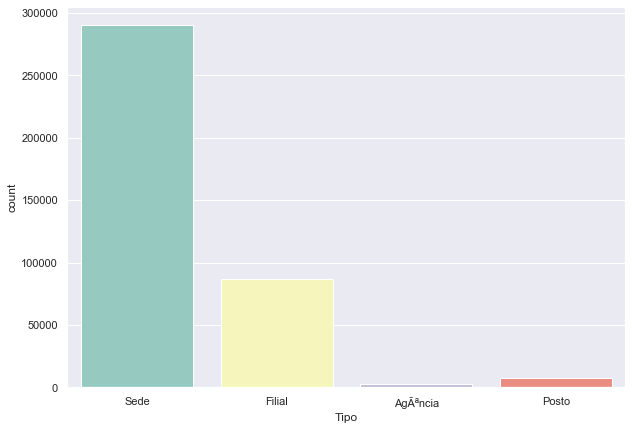

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax = sns.countplot(x="Tipo", data=df1, palette="Set3")

Distribuição de Correspondentes por UF

In [15]:
df1["UF"].value_counts(normalize=True)

SP    0.276549
MG    0.104392
PR    0.081063
RS    0.069570
SC    0.063800
RJ    0.058154
BA    0.048605
GO    0.034760
CE    0.029951
PE    0.029814
ES    0.022730
MT    0.020864
MS    0.019488
PA    0.016855
PB    0.016798
MA    0.016679
RN    0.016186
DF    0.014516
PI    0.012559
AL    0.009991
AM    0.009131
SE    0.007396
RO    0.007153
TO    0.006317
AC    0.002643
AP    0.002168
RR    0.001866
Name: UF, dtype: float64

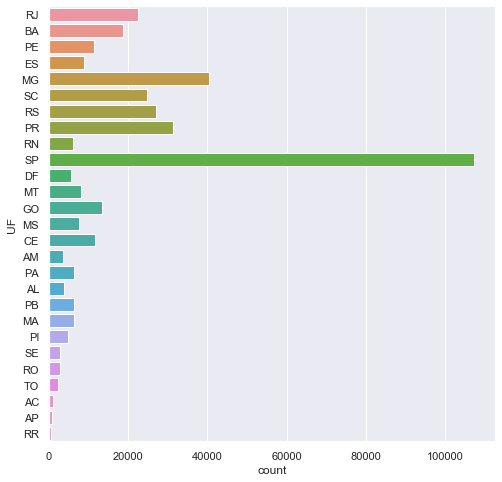

In [16]:
#Distribuição de Correspondentes por UF
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax = sns.countplot(y=df1['UF'], data=df1) 

In [17]:
df1["Municipio"].value_counts().head(50)

SAO PAULO                25174
RIO DE JANEIRO            9229
CURITIBA                  6714
BELO HORIZONTE            6434
BRASILIA                  5623
FORTALEZA                 4635
GOIANIA                   3794
SALVADOR                  3763
PORTO ALEGRE              3676
CAMPINAS                  3373
RECIFE                    3312
CAMPO GRANDE              3212
MANAUS                    2505
RIBEIRAO PRETO            2441
GUARULHOS                 2293
SAO JOSE DO RIO PRETO     2292
SANTO ANDRE               2200
NATAL                     2183
SOROCABA                  2177
UBERLANDIA                2089
BELEM                     1972
JOINVILLE                 1944
JUNDIAI                   1920
LONDRINA                  1901
SAO BERNARDO DO CAMPO     1895
OSASCO                    1891
JOAO PESSOA               1887
CUIABA                    1869
SAO LUIS                  1746
SAO JOSE DOS CAMPOS       1726
FLORIANOPOLIS             1625
TERESINA                  1599
JUIZ DE 

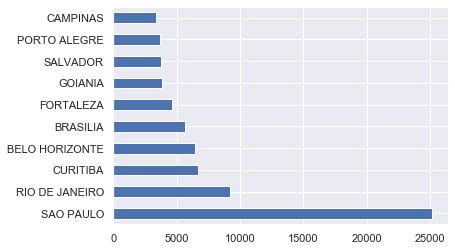

In [18]:
df1["Municipio"].value_counts().head(10).plot.barh()